In [2]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import sys

from itertools import cycle
from collections import defaultdict
from datetime import datetime


%matplotlib inline

In [3]:
DATE= datetime.today().strftime('%m%d%Y')

In [4]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [ ]:
pd.set_option('display.max_rows', None) #displaying all rows

Using glob to read all my csv files and merging them into one

In [5]:
path = './data/'
all_files = glob.glob(path + "*.csv")

li = []
df = []

for file in all_files:
    df = pd.read_csv(file, index_col=None, header=0)
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True)

In [6]:
frame

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,18/08/2012,Arsenal,Sunderland,0,0,D,0,0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,18/08/2012,Fulham,Norwich,5,0,H,2,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,18/08/2012,Newcastle,Tottenham,2,1,H,0,0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,18/08/2012,QPR,Swansea,0,5,A,0,1,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,18/08/2012,Reading,Stoke,1,1,D,0,1,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,E0,13/05/2007,Middlesbrough,Fulham,3,1,H,2,1,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21521,E0,13/05/2007,Portsmouth,Arsenal,0,0,D,0,0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21522,E0,13/05/2007,Sheffield United,Wigan,1,2,A,1,2,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21523,E0,13/05/2007,Tottenham,Man City,2,1,H,2,1,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
frame['Date'] = pd.to_datetime(frame.Date)
a = frame.sort_values(['Date'])

In [15]:
a.to_csv('./data/sorteddf.csv', index=False)

## Reading all matches csv

In [7]:
df = pd.read_csv('./data/sorteddf.csv')

r, c = df.shape
print('Dataframe has {} rows and {} columns.'.format(r,c))

Dataframe has 7175 rows and 111 columns.


In [20]:
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,2000-08-19,Tottenham,Ipswich,3,1,H,2,1,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,2000-08-19,Charlton,Man City,4,0,H,2,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,2000-08-19,Chelsea,West Ham,4,2,H,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,2000-08-19,Coventry,Middlesbrough,1,3,A,1,1,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,2000-08-19,Derby,Southampton,2,2,D,1,2,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR',
       ...
       'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH',
       'MaxCAHA', 'AvgCAHH', 'AvgCAHA'],
      dtype='object', length=111)

# Data cleaning

In [22]:
betting_cols_drop = range(df.columns.get_loc('B365H'), df.columns.size)
df.drop(df.columns[[betting_cols_drop]], inplace=True, axis=1)

/home/emmanuel/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/pandas/core/indexes/base.py:3940: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [31]:
df = df.drop(['Div','Time'],axis=1)

In [32]:
df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AC,HY,AY,HR,AR,Attendance,HHW,AHW,HO,AO
0,2000-08-19,Tottenham,Ipswich,3,1,H,2,1,H,Alan Wiley,...,4,0,0,0,0,36148.0,2.0,1.0,2.0,3.0
1,2000-08-19,Charlton,Man City,4,0,H,2,0,H,Rob Harris,...,6,1,2,0,0,20043.0,2.0,1.0,8.0,6.0
2,2000-08-19,Chelsea,West Ham,4,2,H,1,0,H,Graham Barber,...,7,1,2,0,0,34914.0,1.0,0.0,2.0,3.0
3,2000-08-19,Coventry,Middlesbrough,1,3,A,1,1,D,Barry Knight,...,4,5,3,1,0,20624.0,0.0,1.0,1.0,3.0
4,2000-08-19,Derby,Southampton,2,2,D,1,2,A,Andy D'Urso,...,8,1,1,0,0,27223.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7170,2020-07-26,Man City,Norwich,5,0,H,2,0,H,C Pawson,...,0,1,1,0,0,NaN,NaN,NaN,NaN,NaN
7171,2020-07-26,Newcastle,Liverpool,1,3,A,1,1,D,A Taylor,...,4,1,0,0,0,NaN,NaN,NaN,NaN,NaN
7172,2020-07-26,Southampton,Sheffield United,3,1,H,0,1,A,P Bankes,...,1,0,1,0,0,NaN,NaN,NaN,NaN,NaN
7173,2020-07-26,West Ham,Aston Villa,1,1,D,0,0,D,M Oliver,...,7,2,1,0,0,NaN,NaN,NaN,NaN,NaN


In [3]:
df.to_csv('./data/clean_matches.csv', index=False)
df = pd.read_csv('./data/clean_matches.csv')

In [34]:
print('Dataframe shape: {}'.format(df.shape))
print('Column names are: {}'.format(df.columns))
df.head()

Dataframe shape: (7175, 27)
Column names are: Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR', 'Attendance', 'HHW', 'AHW', 'HO', 'AO'],
      dtype='object')


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AC,HY,AY,HR,AR,Attendance,HHW,AHW,HO,AO
0,2000-08-19,Tottenham,Ipswich,3,1,H,2,1,H,Alan Wiley,...,4,0,0,0,0,36148.0,2.0,1.0,2.0,3.0
1,2000-08-19,Charlton,Man City,4,0,H,2,0,H,Rob Harris,...,6,1,2,0,0,20043.0,2.0,1.0,8.0,6.0
2,2000-08-19,Chelsea,West Ham,4,2,H,1,0,H,Graham Barber,...,7,1,2,0,0,34914.0,1.0,0.0,2.0,3.0
3,2000-08-19,Coventry,Middlesbrough,1,3,A,1,1,D,Barry Knight,...,4,5,3,1,0,20624.0,0.0,1.0,1.0,3.0
4,2000-08-19,Derby,Southampton,2,2,D,1,2,A,Andy D'Urso,...,8,1,1,0,0,27223.0,0.0,0.0,0.0,2.0


In [35]:
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,AC,HY,AY,HR,AR,Attendance,HHW,AHW,HO,AO
count,7175.000000,7175.000000,7175.000000,7175.000000,7175.000000,7175.000000,7175.000000,7175.000000,7175.000000,7175.000000,...,7175.000000,7175.000000,7175.000000,7175.000000,7175.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.531010,1.139373,0.681394,0.498118,13.599443,10.646132,6.277631,4.854355,11.350941,11.898537,...,4.800000,1.411986,1.758188,0.062718,0.090732,32911.721053,0.381579,0.223684,3.628947,3.728947
std,1.294347,1.130502,0.830629,0.714434,5.268783,4.558032,3.381985,2.841722,3.749367,3.910380,...,2.738995,1.190531,1.272879,0.254258,0.298667,12600.528803,0.640891,0.459399,2.602354,2.615703
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,14651.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,4.000000,3.000000,9.000000,9.000000,...,3.000000,0.000000,1.000000,0.000000,0.000000,22006.000000,0.000000,0.000000,2.000000,2.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,6.000000,4.000000,11.000000,12.000000,...,4.000000,1.000000,2.000000,0.000000,0.000000,33199.000000,0.000000,0.000000,3.000000,3.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,13.000000,8.000000,6.000000,14.000000,14.000000,...,6.000000,2.000000,3.000000,0.000000,0.000000,38343.500000,1.000000,0.000000,5.000000,5.000000
max,9.000000,9.000000,5.000000,5.000000,43.000000,30.000000,24.000000,20.000000,33.000000,28.000000,...,19.000000,7.000000,9.000000,3.000000,2.000000,67637.000000,4.000000,2.000000,14.000000,17.000000


In [ ]:
pd.set_option('display.max_columns', None)

## Top historic in  a home game scorer 

In [37]:
df[df['FTHG'] == df['FTHG'].max()]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AC,HY,AY,HR,AR,Attendance,HHW,AHW,HO,AO
3123,2009-11-22,Tottenham,Wigan,9,1,H,1,0,H,P Walton,...,5,1,0,0,0,NaN,NaN,NaN,NaN,NaN


## Top historic away scorer

In [38]:
df[df['FTAG'] == df['FTAG'].max()]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AC,HY,AY,HR,AR,Attendance,HHW,AHW,HO,AO
6885,2019-10-25,Southampton,Leicester,0,9,A,0,5,A,A Marriner,...,7,0,0,1,0,NaN,NaN,NaN,NaN,NaN


## Top shooter in a home game

In [43]:
df[df['HS'] == df['HS'].max()]


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Attendance,HHW,AHW,HO,AO
5185,2015-03-21,Man City,West Brom,3,0,H,2,0,H,N Swarbrick,43,3,16,0,6,5,9,2,0,0,0,1,NaN,NaN,NaN,NaN,NaN


It was Man city with 43 shots and 16 on target for 3 shots for west bromwich
but 0 on target, we can see that even being shot at so many times, if we see
at the foults made by each team we can see that they are almost the same but they
lost a player due to a red card.

## Top shooter with no sent-offs 

In [47]:
#getting the matches with no red cards in it 

df_no_red = df[(df['HR'] == 0) & (df['AR'] == 0)]
df_no_red.shape

(6182, 27)

In [49]:
df_no_red[df_no_red['HS'] == df_no_red['HS'].max()]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Attendance,HHW,AHW,HO,AO
4742,2014-01-29,Chelsea,West Ham,0,0,D,0,0,D,N Swarbrick,39,1,9,1,12,11,13,3,1,3,0,0,NaN,NaN,NaN,NaN,NaN


Again the home team has clearly more shots than the away team
39 Chelsea for just 1 for West Ham. Without a red card Chelse was the best shooter

In [ ]:
#Away tema with most shots in a match

In [50]:
df[df['AS'] == df['AS'].max()]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Attendance,HHW,AHW,HO,AO
4179,2012-09-22,Swansea,Everton,0,3,A,0,2,A,A Taylor,18,30,11,19,23,7,8,3,4,1,1,0,NaN,NaN,NaN,NaN,NaN
6123,2017-10-22,Everton,Arsenal,2,5,A,1,1,D,C Pawson,8,30,3,14,14,14,0,7,1,1,1,0,NaN,NaN,NaN,NaN,NaN


We have 2 (Arsenal and Everton) teams, one is shooting way more than the other, each having 30 shots
for 18 and 8 fro the home team, but can see that eficiency for Arsenal could be better.


# Wich team has scored more goals and wich had most shots(overall)??

In [8]:
#Building a new dataframe giving the total goals and shots for each team


team_goal = defaultdict(int)
team_shot = defaultdict(int)
team_goal_diff = defaultdict(int)
team_goals_shots = {}



for HomeTeam, AwayTeam, FTHG, FTAG, HS, AS in df[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HS', 'AS']].values:
    team_goal[HomeTeam] += FTHG
    team_goal[AwayTeam] += FTAG
    team_shot[HomeTeam] += HS
    team_shot[AwayTeam] += AS
    team_goal_diff[HomeTeam] += (FTHG - FTAG)
    team_goal_diff[AwayTeam] += (FTAG - FTHG)

df_team_goals = pd.DataFrame(team_goal.items(), columns=['Team', 'Goals'])
df_team_shot = pd.DataFrame(team_shot.items(), columns=['Team', 'Shots'])
team_goal_diff = pd.DataFrame(team_goal_diff.items(), columns= ['Team', 'GoalDiff'])

In [19]:
#Higher scorers
df_team_goals.head()

,Team,Goals
0,Arsenal,1352
1,Man United,1335
2,Chelsea,1328
3,Man City,1291
4,Liverpool,1283


In [15]:
df_team_goals.sort_values(by=['Goals'], ascending=False, inplace=True)
df_team_goals.reset_index(inplace=True, drop=True)

In [17]:
df_team_goals.head()

,Team,Goals
0,Arsenal,1352
1,Man United,1335
2,Chelsea,1328
3,Man City,1291
4,Liverpool,1283


Man. City it is 3rd top historical scorer wich is remarcable since Man city
has been only on the top not as long as other top scorers.

## Least scorers

In [18]:
df_team_goals.tail()

,Team,Goals
38,Ipswich,57
39,Blackpool,55
40,Huddersfield,50
41,Coventry,36
42,Bradford,30


None of these teams are still on EPL so these numbers dont tell the whole 
truth since some of them have only been for a couple of seasons on the 
league

## Top shooters

In [20]:
df_team_shot.sort_values(by='Shots', ascending=False, inplace=True)
df_team_shot.reset_index(inplace=True, drop=True)
df_team_shot.head()

,Team,Shots
0,Liverpool,10951
1,Chelsea,10842
2,Man United,10425
3,Man City,10256
4,Arsenal,10036


We can see that obviously the same teams are top scorers and top shooters

In [21]:
df_team_shot.tail()

,Team,Shots
38,Derby,640
39,Ipswich,491
40,Blackpool,446
41,Coventry,389
42,Bradford,371


Teams not in the league again. 

# Shots per goal made

In [24]:
df_team_goals_shots = df_team_goals.copy()
df_team_goals_shots = df_team_goals_shots.merge(df_team_shot)
df_team_goals_shots['Shots_per_goal'] = (df_team_goals_shots['Shots']/df_team_goals_shots['Goals'].round(2))
df_team_goals_shots.sort_values(by='Shots_per_goal', inplace=True)
df_team_goals_shots.reset_index(inplace=True, drop=True)
df_team_goals_shots

,Team,Goals,Shots,Shots_per_goal
0,Arsenal,1352,10036,7.423077
1,Leeds,162,1250,7.716049
2,Man United,1335,10425,7.808989
3,Reading,136,1073,7.889706
4,Man City,1291,10256,7.944229
5,Blackpool,55,446,8.109091
6,Charlton,261,2121,8.126437
7,Chelsea,1328,10842,8.164157
8,Leicester,423,3578,8.458629
9,Liverpool,1283,10951,8.535464


We can see that accuracy on the attack it is obvious on the top teams
some of these dta it is not accurate because Reading and Leeds are up there 
but they are every year playing in the league

# Goal difference

In [26]:
team_goal_diff.sort_values(by='GoalDiff', ascending=False, inplace=True)
team_goal_diff.reset_index(inplace=True, drop=True)
team_goal_diff

,Team,GoalDiff
0,Man United,705
1,Chelsea,681
2,Arsenal,602
3,Liverpool,579
4,Man City,505
5,Tottenham,262
6,Everton,87
7,Ipswich,15
8,Leicester,4
9,Leeds,-17


Most of the teams are in negative numbers only 8 out of 42 have positive numbers
on the goal difference.

# Looking who is refereeing

most red cards

In [29]:


df_ref_red = df[['Referee', 'HR', 'AR']].groupby(df['Referee']).sum()
df_ref_red.head()

,HR,AR
Referee,,
A D'Urso,5,5
A Madley,1,0
A Marriner,20,36
A Taylor,20,16
A Wiley,8,20


This is historical so it is of no use for us since nost of these referees are not active
we have to select only the active ones so I'm going to pick he ones from last seasons.


In [38]:
#I chose referees fro the last 4 seasons

df_act_ref = df.loc[df['Date'] >='2016']
df_act_ref.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AC,HY,AY,HR,AR,Attendance,HHW,AHW,HO,AO
5465,2016-01-02,West Ham,Liverpool,2,0,H,1,0,H,R Madley,...,9,1,1,0,0,NaN,NaN,NaN,NaN,NaN
5466,2016-01-02,Sunderland,Aston Villa,3,1,H,1,0,H,C Pawson,...,3,3,4,0,0,NaN,NaN,NaN,NaN,NaN
5467,2016-01-02,Watford,Man City,1,2,A,0,0,D,M Atkinson,...,5,1,0,0,0,NaN,NaN,NaN,NaN,NaN
5468,2016-01-02,Arsenal,Newcastle,1,0,H,0,0,D,A Taylor,...,4,2,2,0,0,NaN,NaN,NaN,NaN,NaN
5469,2016-01-02,Leicester,Bournemouth,0,0,D,0,0,D,A Marriner,...,1,1,1,0,1,NaN,NaN,NaN,NaN,NaN


In [50]:
df_act_ref_red = df_act_ref[['Referee', 'HR', 'AR']].groupby(df['Referee']).sum()
print(df_act_ref_red.head(),'\n',
      'Dataframe shape:',df_act_ref_red.shape)

            HR  AR
Referee           
A Madley     1   0
A Marriner   5   8
A Taylor    10   4
C Kavanagh   2   3
C Pawson     6  12 
 Dataframe shape: (29, 2)


In [53]:
df_act_ref_red['TotalReds'] = df_act_ref_red['HR'] + df_act_ref_red['AR']
df_act_ref_red.sort_values(by='TotalReds', ascending=False, inplace=True)
df_act_ref_red.reset_index(inplace=True)
df_act_ref_red.head(10)

,level_0,index,Referee,HR,AR,TotalReds
0,0,0,M Dean,7,18,25
1,1,1,C Pawson,6,12,18
2,2,2,M Oliver,7,10,17
3,3,3,M Atkinson,5,10,15
4,4,4,J Moss,9,6,15
5,5,5,A Taylor,10,4,14
6,6,6,A Marriner,5,8,13
7,7,7,G Scott,6,5,11
8,8,8,K Friend,6,3,9
9,9,9,L Mason,4,5,9


In [61]:
print(f"Mean red cards for away teams:{df_act_ref_red['AR'].mean()}")
print(f"Mean red cards for home teams:{df_act_ref_red['HR'].mean()}")

Mean red cards for away teams:3.8620689655172415
Mean red cards for home teams:3.0689655172413794


We can see wich referees are more prone to show red cards, and we can see
that most of them tend to show them to visitors almost a point

In [66]:
# Teams with more sent-offs by M Dean and Pawson

df[['HomeTeam', 'AwayTeam', 'Referee', 'HR', 'AR']][(df['Referee'] == 'M Dean') & ((df['HR'] > 0) | 
                                                                                   (df['AR'] > 0))]

,HomeTeam,AwayTeam,Referee,HR,AR
448,Tottenham,Southampton,M Dean,0,1
467,Man City,Blackburn,M Dean,1,0
534,Bolton,Chelsea,M Dean,0,1
554,Aston Villa,West Brom,M Dean,1,0
618,Arsenal,West Ham,M Dean,0,1
...,...,...,...,...,...
6730,Wolves,Man United,M Dean,0,1
6828,Southampton,Man United,M Dean,1,0
6844,Aston Villa,West Ham,M Dean,0,1
7044,Tottenham,Man City,M Dean,0,1


In [72]:
df[['HomeTeam', 'AwayTeam', 'Referee', 'HR', 'AR']][(df['Referee'] == 'C Pawson') & 
                                                    ((df['HR'] > 0) | (df['AR'] > 0))]#.groupby(['HomeTeam'])

,HomeTeam,AwayTeam,Referee,HR,AR
4968,Crystal Palace,Chelsea,C Pawson,1,1
5013,Hull,Tottenham,C Pawson,1,0
5042,Aston Villa,Leicester,C Pawson,0,1
5097,Sunderland,Liverpool,C Pawson,1,0
5141,Southampton,West Ham,C Pawson,0,1
5239,Swansea,Stoke,C Pawson,0,1
5383,Southampton,Bournemouth,C Pawson,1,0
5514,Everton,Newcastle,C Pawson,0,1
5674,West Ham,Bournemouth,C Pawson,0,1
5818,Stoke,Leicester,C Pawson,0,1


## Average goals per game 

In [10]:
games = len(df)
goals = df['FTHG'].sum() + df['FTAG'].sum()
goals_per_game = goals / games
print('Average goals per game in the league: {:.2}'.format(goals_per_game))

Average goals per game in the league: 2.7


# Goals in the first half 

In [11]:
goals_f_h = df['HTHG'].sum() + df['HTAG'].sum()
total_g_per_fh = goals_f_h/games
print('Avg. number of goals per first half {:.2}'.format(total_g_per_fh))

Avg. number of goals per first half 1.2


# Goals in second half

In [12]:
goals_s_h = goals - goals_f_h
goals_per_s_h = goals_s_h/games
print('Avg. of goals in secong half {:.2}'.format(goals_per_s_h))

Avg. of goals in secong half 1.5


It is more likely to see goals in the second half than in the first one,
can be due to low stamina, would be nice to see when is it that it starts really
to tend to score(minute of the game)

## Historical EPL classification table

In [13]:
results = [] 

for team in df['HomeTeam'].unique():
    home_results = df[df['HomeTeam'] == team]
    home_played = len(home_results.index)
    home_w = home_results.FTR[home_results.FTR == 'H'].count()
    home_d = home_results.FTR[home_results.FTR == 'D'].count()
    home_l = home_results.FTR[home_results.FTR == 'A'].count()
    home_goals_fav = home_results.FTHG.sum()
    home_goals_aga = home_results.FTAG.sum()
    
    
    away_results = df[df['AwayTeam'] == team]
    away_played = len(away_results.index)
    away_w = away_results.FTR[away_results.FTR == 'A'].count()
    away_d = away_results.FTR[away_results.FTR == 'D'].count()
    away_l = away_results.FTR[away_results.FTR == 'H'].count()
    away_goals_fav = away_results.FTAG.sum()
    away_goals_aga = away_results.FTAG.sum()
    
    
    result_d = {} #storing the results
    result_d['Team'] = team
    result_d['P'] = home_played + away_played
    result_d['W'] = home_w + away_w
    result_d['D'] = home_d + away_d
    result_d['L'] = home_l + away_l
    result_d['GF'] = home_goals_fav + away_goals_fav
    result_d['GA'] = home_goals_aga + away_goals_aga
    result_d['GD'] = result_d['GF'] - result_d['GA']
    result_d['PTS'] = result_d['W']*3 + result_d['D']
    
    results.append(result_d)
    
    
#a whole classification sorted by points ad goal diff

hist_clas = pd.DataFrame(results, columns=['Team', 'P', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'PTS'])
hist_clas.sort_values(by=['PTS', 'GD'], ascending=False, inplace=True)
hist_clas['Ranking'] = range(1, len(hist_clas)+1) #adding EPL ranking
hist_clas.set_index(['Ranking'], inplace=True, drop=True)
hist_clas

,Team,P,W,D,L,GF,GA,GD,PTS
Ranking,,,,,,,,,
1,Man United,717,443,150,124,1335,831,504,1479
2,Chelsea,717,431,154,132,1328,847,481,1447
3,Arsenal,717,400,174,143,1352,875,477,1374
4,Liverpool,718,391,173,154,1283,825,458,1346
5,Man City,718,370,143,205,1291,881,410,1253
6,Tottenham,718,338,169,211,1132,845,287,1183
7,Everton,717,281,203,233,962,768,194,1046
8,Newcastle,640,213,163,264,774,694,80,802
9,Aston Villa,604,184,182,238,709,685,24,734


Here we have all thepoints made by all the teams that had played in the EPL
we can see wich ones only made in one season and the ones with the most seasons

# Team with the most draws and least games

In [14]:
max_draws = hist_clas['D'].max()
team_drawer = hist_clas['Team'][hist_clas['D'] == max_draws].values
min_draws = hist_clas['D'].min()
team_least_draws = hist_clas['Team'][hist_clas['D'] == min_draws].values

print('Team with most draws({}): {}'.format(max_draws, ','.join(team_drawer)))
print('Team with lest draws ({}): {}'.format(min_draws, ','.join(team_least_draws)))

Team with most draws(203): Everton
Team with lest draws (6): Ipswich


 ## Getting the most and least common scores

In [ ]:
# Adding a new columns with the results of the game

In [15]:
df['Score'] = df['FTHG'].map(str) + ':' + df['FTAG'].map(str)
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Score
0,E0,2000-08-19,Tottenham,Ipswich,3,1,H,2,1,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3:1
1,E0,2000-08-19,Charlton,Man City,4,0,H,2,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4:0
2,E0,2000-08-19,Chelsea,West Ham,4,2,H,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4:2
3,E0,2000-08-19,Coventry,Middlesbrough,1,3,A,1,1,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:3
4,E0,2000-08-19,Derby,Southampton,2,2,D,1,2,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2:2


In [39]:
score = pd.DataFrame(df['Score'].groupby(df['Score']).count())
score.columns = ['Count']
score.sort_values(by='Count', inplace=True, ascending=False)
full_scores = score['Count'].sum()
score['Count%'] = (100*(score['Count']/full_scores)).round(1)
print('Most common scores:')
score.head()



Most common scores:


,Count,Count%
Score,,
1:1,789,11.0
1:0,750,10.5
2:1,635,8.9
2:0,618,8.6
0:0,561,7.8


In [40]:
print('Least common scores:')
score.tail()

Least common scores:


,Count,Count%
Score,,
7:4,1,0.0
0:9,1,0.0
8:1,1,0.0
8:2,1,0.0
9:1,1,0.0


## Making score matrix

In [ ]:
# create df of scores, home goals as rows ans away as columns


df_scores = pd.DataFrame()
df_scores.columns.name='AwayGoals'
df_scores.index.name='HomeGoals'

#max home goals and max away_goals

max_hg = df['FTHG'].max()
max_ag = df['FTAG'].max()

#empty matrix(to get all possible scores to the max one )

for home in range(max_hg + 1):
    for away in range(max_ag + 1):
        df_scores.assign((hg, ag, '-'))
        
#ndarray of scores

scores = df['Score'].unique()
scores.sort()


# % for each value in the matrix

for score in scores:
    score_split = score.split(':')
    home, away = int(score_split[0]), int(score_split[1])
    df_scores.at(home, away, '{:.1%}'.format((df['Score'][df['Score'] == score].count())/games))
df_scores                    

## Percentage of Home wins, Home draws and away wins

In [17]:
home_w = df['FTR'][df['FTR'] == 'H'].count()
away_w = df['FTR'][df['FTR'] == 'A'].count()
draws = df['FTR'][df['FTR'] == 'D'].count()

print('total games:{}, home wins:{}, away wins:{}, draws:{}'.format(games,home_w,away_w, draws))

home_w_pc = home_w/games
away_w_pc = away_w/games
draws_pc = draws/games

print('total games:{}, home wins %:{:.1%}, away wins %:{:.1%}, draws %:{:.1%}'.format(games, home_w_pc, away_w_pc, draws_pc))


total games:7175, home wins:3341, away wins:2035, draws:1799
total games:7175, home wins %:46.6%, away wins %:28.4%, draws %:25.1%


## Results in percentage

In [53]:
# Compare performances

percent = (100*(df['FTR'].groupby(df['FTR']).count())/games).round()
percent.sort_values(ascending=False)

df_per = pd.DataFrame({'historic EPL %:' : percent})
df_per.index.name = 'Full time result'
df_per.T

Full time result,A,D,H
historic EPL %:,28.0,25.0,47.0


We can see that it is pretty hard to win away from home
woud be nice to see the data now in current times if 
this percentage has decreased or not without the supporters

In [33]:
team_points = defaultdict(list)

#dictionary mapping points

HFTR_points = {'H': 3, 'A': 0, 'D': 1}
AFTR_points = {'H': 0, 'A': 3, 'D': 1}

for ht, at, ftr in df[['HomeTeam', 'AwayTeam', 'FTR']].values:
    if team_points[ht]:
        team_points[ht].append(team_points[ht][-1] + HFTR_points[ftr])
    else:
        team_points[ht].append(HFTR_points[ftr])
        
    if team_points[at]:
        team_points[at].append(team_points[at][-1] + AFTR_points[ftr])
    else:
        team_points[at].append(AFTR_points[ftr])

making a subset of team_points to check the data

In [8]:


#print "{0:16} {1:<8} {2:<8}".format('Team', 'Played', 'Cum Points (last 3)')
#print "{0:16} {1:<8} {2:<8}".format('---------------', '-------', '--------------------')
#for team, points_list in sorted(team_points.items(), key=lambda (k, v): v[-1], reverse=True):
    #print "{0:16} {1:<8} {2:<8}".format(team, len(points_list), points_list[-3:])



In [62]:
a = pd.DataFrame.from_dict(team_points, orient='index')
a = a.fillna(0)
a.T

,Tottenham,Ipswich,Charlton,Man City,Chelsea,West Ham,Coventry,Middlesbrough,Derby,Southampton,...,Hull,Stoke,Burnley,Blackpool,QPR,Swansea,Cardiff,Bournemouth,Huddersfield,Brighton
0,3.0,0.0,3.0,0.0,3.0,0.0,0.0,3.0,1.0,1.0,...,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0
1,4.0,1.0,3.0,3.0,3.0,0.0,3.0,4.0,1.0,1.0,...,4.0,3.0,3.0,3.0,3.0,1.0,3.0,0.0,6.0,0.0
2,4.0,4.0,3.0,3.0,4.0,1.0,6.0,4.0,2.0,2.0,...,4.0,3.0,4.0,4.0,3.0,2.0,4.0,3.0,7.0,1.0
3,7.0,4.0,4.0,6.0,5.0,2.0,6.0,5.0,3.0,3.0,...,7.0,3.0,4.0,7.0,4.0,2.0,5.0,4.0,7.0,4.0
4,10.0,4.0,5.0,6.0,6.0,2.0,7.0,5.0,4.0,3.0,...,8.0,4.0,7.0,7.0,7.0,5.0,5.0,4.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,1173.0,0.0,0.0,1241.0,1441.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
714,1176.0,0.0,0.0,1244.0,1444.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
715,1179.0,0.0,0.0,1247.0,1444.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
716,1182.0,0.0,0.0,1250.0,1447.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:

top = hist_clas.iloc[0:3]
top

,Team,P,W,D,L,GF,GA,GD,PTS
Ranking,,,,,,,,,
1,Man United,717,443,150,124,1335,831,504,1479
2,Chelsea,717,431,154,132,1328,847,481,1447
3,Arsenal,717,400,174,143,1352,875,477,1374


In [19]:
last = hist_clas.tail(10)
last

,Team,P,W,D,L,GF,GA,GD,PTS
Ranking,,,,,,,,,
34,Brighton,114,27,36,51,108,125,-17,117
35,Sheffield United,76,24,20,32,71,59,12,92
36,QPR,114,22,26,66,115,132,-17,92
37,Ipswich,38,20,6,12,57,41,16,66
38,Cardiff,76,17,13,46,66,98,-32,64
39,Huddersfield,76,12,17,47,50,80,-30,53
40,Derby,76,11,20,45,57,89,-32,53
41,Blackpool,38,10,9,19,55,62,-7,39
42,Coventry,38,8,10,20,36,45,-9,34


In [35]:
FIG_SIZE = (12, 8)

# create line styles to cycle
lines = ["-","--","-.",":"]
linecycler = cycle(lines)

# calculate limits
max_played = max(played for _team, played, _points in top)
max_points = max(points for _team, _played, points in top)


# plot
fig = plt.figure(figsize=FIG_SIZE)
                    
for team, _played, _points in top:
    team_cum_points_list = team_points[team]
    plt.plot(range(1, len(team_cum_points_list)+1), team_cum_points_list, 
             next(linecycler), label=team)

plt.xticks(range(1, max_played+1))
plt.yticks(range(0, max_points, 5))
plt.xlabel('Match Number')
plt.ylabel('Cumulative Points')
plt.xlim(1, max_played+1)
plt.ylim(0, max_points+1)
plt.legend(loc='upper left')
plt.title('Cumulative Points vs Match Number For Top 5 Teams \n(at {})'.format(DATE), 
                                                                             fontsize=16, 
                                                                             fontweight='bold')
plt.show()

ValueError: too many values to unpack (expected 3)

In [20]:
BOT_TEAMS = 9

btm_team_summary = hist_clas[['Team', 'P', 'PTS']][-BOT_TEAMS:].values
print(btm_team_summary)

[['Sheffield United' 76 92]
 ['QPR' 114 92]
 ['Ipswich' 38 66]
 ['Cardiff' 76 64]
 ['Huddersfield' 76 53]
 ['Derby' 76 53]
 ['Blackpool' 38 39]
 ['Coventry' 38 34]
 ['Bradford' 38 26]]


In [ ]:
#Im goint to create a function to return match number for an event, this can be 
#used to determine the first match after a coach takes over

In [22]:
def key_event(event_date, team):
    """Return match number on or after given event_date and team.
    input: str even_time-date(y/m/d)
            str team-team name case sensitive
            output: int match_number, starts at 0, None if no match"""
    DATE_='%y-%m-%d'
    
    #df for the team 
    df_team = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)].reset_index(drop=True)
    
    #date to datetime(np datetime64)
    df_team['Date'] = pd.to_datetime(df_team['Date'],format=DATE)
    
    #event date to numpy datetime64, to compare
    event_date = np.datetime64(datetime.strptime(event_date, DATE))
    
    #match finder
    for match_date in df_team['Date'].values:
        if match_date >= event_date:
            return int(df_team[df_team['Date'] == match_date].index.tolist()[0])
    #if not match
    return None
    

To test it I'm going to put some events and store them in a dictionary
so we can see if my function works.

In [29]:
key_event = {} #event at wich the event took place

# I found some events to store them  '2018-05-06'

key_event['Manchester City'] = (key_event('2016-02-01', 'Manchester City'), 'Pep Guardiola takes over')
key_event['Manchester United'] = (key_event('2017-05-27', 'Manchester United'), 'Jose Mourinho takes over')
key_event['Manchester United'] = (key_event('2008-12-12', 'Manchester United'), 'Cristiano Ronaldo pre-signs with Real Madrid')
key_event['Crystal Palace'] = (key_event('2015-01-01', 'Crystal Palace'), 'Alan Pardew takes over')
key_event['Wolverhampton Wnaderers'] = (key_event('2017-05-31', 'Wolverhampton Wanderers'), 'Nuno Espirito Santo takes over')
key_event['Leicester City FC'] = (key_event('2015-08-13', 'Leicester City FC'), 'Claudio Ranieri takes over')
key_event['Arsenal FC'] = (key_event('2018-05-06', 'Arsenal FC'), 'Arsene Wegner leaves Arsenal FC')


key_event


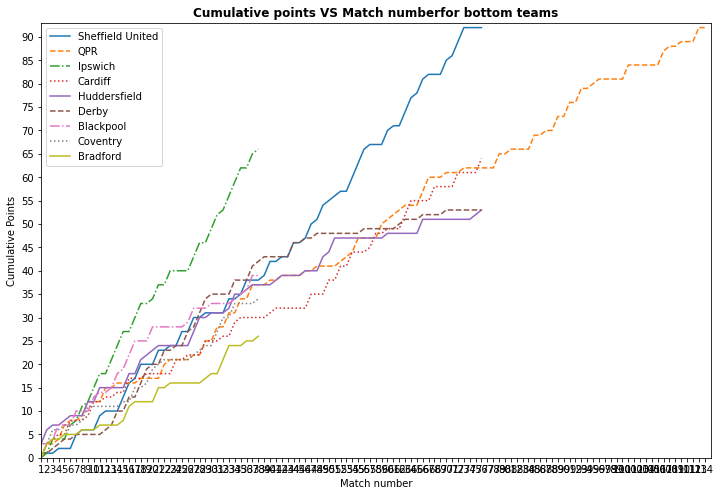

In [34]:
# define figure size
FIG_SIZE = (12, 8)

# create line styles to cycle

lines = ["-","--","-.",":"]
linecycler = cycle(lines)

#limits

max_played = max(played for _team, played, _points in btm_team_summary)
max_points = max(points for _team, _played, points in btm_team_summary)

#plot

fig = plt.figure(figsize=FIG_SIZE)

for team, _played, _points in btm_team_summary:
    team_acc_points_lst = team_points[team]
    team_match_lst = range(1, len(team_acc_points_lst)+1)
    
    plt.plot(team_match_lst, team_acc_points_lst, next(linecycler), label=team)
    
    #if we have an event then annotate
    
    if team in key_event_dict:
        #getting match number and event
        
        event_match, event_dec = key_event_dict[team]
        #calculate position of avent
        x, y = team_match_lst[event_match], team_acc_points_lst[event_match]
        #annotate with arrow below event
        
        plt.annotate(event_desc, xy=(x, y), xytext=(x,y-10),
                    arrowprops = dict(facecolor='black', width=.5,
                                     shrink=.05, headwidth=4,
                                     frac=.05))
plt.xticks(range(1, max_played+1))
plt.yticks(range(0, max_points, 5))
plt.xlabel('Match number')
plt.ylabel('Cumulative Points')
plt.xlim(1, max_played+1)
plt.ylim(0, max_points+1)
plt.legend(loc='upper left')
plt.title('Cumulative points VS Match numberfor bottom teams',fontweight='bold')
plt.show()

Here there is a plot of he cumulative points for the least habitual teams
that's why we can see that some of the teams, as this is just a preview to see it better we would have choose less seasons.
And here we could have some event to see how some of them affected the team.
